In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, fbeta_score
import timeit

In [3]:
#path = "/content/Minor Dataset - Sheet1.csv"

In [4]:
df = pd.read_csv('Minor.csv')

In [5]:
df.head(10)

,DEMAND,Time (HH:MM),Pressure before leakage,Pressure at leakage,Pressure after leakage,Flow before leakage,Flow after leakage,DEMAND AT LEAKAGE,Label
0,0.3,0:00,1074.62,1030.86,987.09,1.13,1.13,0.00,No leakage
1,0.3,0:00,1060.70,993.10,950.52,1.43,1.11,0.32,Leakage
2,0.3,0:00,1051.89,956.91,915.49,1.71,1.09,0.62,Leakage
3,0.3,0:00,1029.34,666.41,634.43,3.53,0.95,2.58,Leakage
4,0.3,0:00,1023.88,394.03,371.48,4.76,0.79,3.97,Leakage
5,0.3,0:00,1021.42,159.00,145.63,5.64,0.59,5.04,Theft
6,0.3,0:00,1021.04,110.87,99.68,5.80,0.54,5.26,Theft
7,0.3,0:10,1074.61,1030.85,987.09,1.13,1.13,0.00,No leakage
8,0.3,0:10,1060.70,993.09,950.52,1.43,1.11,0.32,Leakage
9,0.3,0:10,1051.88,956.90,915.48,1.71,1.09,0.62,Leakage


In [6]:
df.isnull().sum()

DEMAND                     0
Time (HH:MM)               0
Pressure before leakage    0
Pressure at leakage        0
Pressure after leakage     1
Flow before leakage        0
Flow after leakage         0
DEMAND AT LEAKAGE          0
Label                      0
dtype: int64

In [7]:
feature_name = 'Pressure after leakage'  # Replace 'your_feature_name' with the actual feature name

# Calculate the mean of the feature
feature_mean = df[feature_name].mean()

# Fill null values in the specified feature with its mean
df[feature_name].fillna(feature_mean, inplace=True)

In [8]:
df.isnull().sum()

DEMAND                     0
Time (HH:MM)               0
Pressure before leakage    0
Pressure at leakage        0
Pressure after leakage     0
Flow before leakage        0
Flow after leakage         0
DEMAND AT LEAKAGE          0
Label                      0
dtype: int64

In [9]:
print(df.apply(lambda col: col.unique()))

DEMAND                     [0.3, 0.2, 0.4, 0.5, 0.8, 1.1, 1.4, 1.2, 1.3, ...
Time (HH:MM)               [0:00, 0:10, 0:20, 0:30, 0:40, 0:50, 1:00, 1:1...
Pressure before leakage    [1074.62, 1060.7, 1051.89, 1029.34, 1023.88, 1...
Pressure at leakage        [1030.86, 993.1, 956.91, 666.41, 394.03, 159.0...
Pressure after leakage     [987.09, 950.52, 915.49, 634.43, 371.48, 145.6...
Flow before leakage        [1.13, 1.43, 1.71, 3.53, 4.76, 5.64, 5.8, 1.04...
Flow after leakage         [1.13, 1.11, 1.09, 0.95, 0.79, 0.59, 0.54, 1.0...
DEMAND AT LEAKAGE          [0.0, 0.32, 0.62, 2.58, 3.97, 5.04, 5.26, 2.61...
Label                                           [No leakage, Leakage, Theft]
dtype: object


In [10]:
# find the count of unique values in the index
df['Label'].value_counts()

Label
Leakage       1156
Theft          578
No leakage     289
Name: count, dtype: int64

In [11]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}:\t{unique_values} ")
# features = df.iloc[:, :-3]  # Selecting all columns except the last three

# # Include the last two columns as part of the features
# last_two_columns = df.iloc[:, -2:]
# data = pd.concat([features, last_two_columns], axis=1)
# labels = df.iloc[:, -3]

DEMAND:	14 
Time (HH:MM):	289 
Pressure before leakage:	1269 
Pressure at leakage:	1256 
Pressure after leakage:	1200 
Flow before leakage:	116 
Flow after leakage:	78 
DEMAND AT LEAKAGE:	88 
Label:	3 


In [12]:
data = df.iloc[:, :-1]
labels = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1618, 8)
(405, 8)
(1618,)
(405,)


In [14]:

labels.head()

0    No leakage
1       Leakage
2       Leakage
3       Leakage
4       Leakage
Name: Label, dtype: object

In [15]:
data= data.drop(df.columns[1], axis=1)
data.head()

,DEMAND,Pressure before leakage,Pressure at leakage,Pressure after leakage,Flow before leakage,Flow after leakage,DEMAND AT LEAKAGE
0,0.3,1074.62,1030.86,987.09,1.13,1.13,0.00
1,0.3,1060.70,993.10,950.52,1.43,1.11,0.32
2,0.3,1051.89,956.91,915.49,1.71,1.09,0.62
3,0.3,1029.34,666.41,634.43,3.53,0.95,2.58
4,0.3,1023.88,394.03,371.48,4.76,0.79,3.97


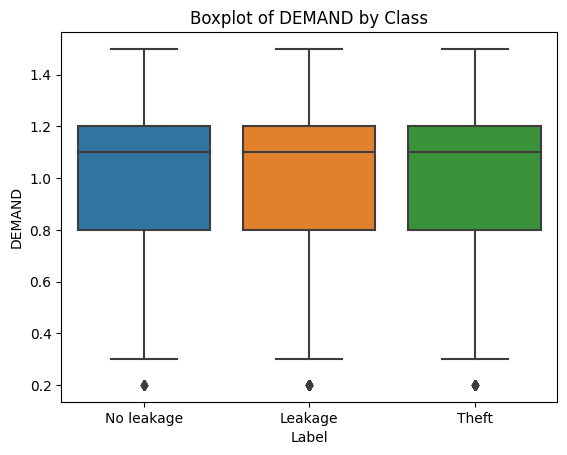

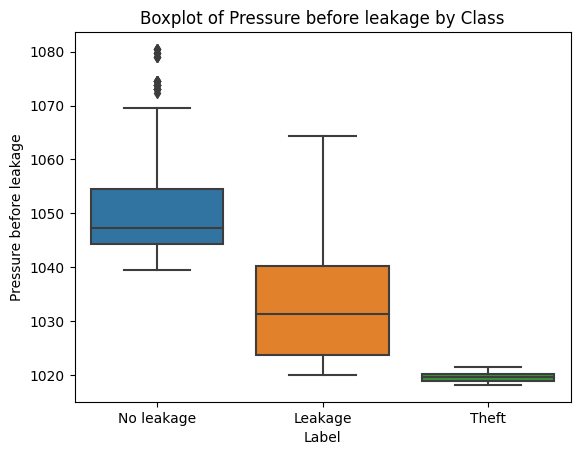

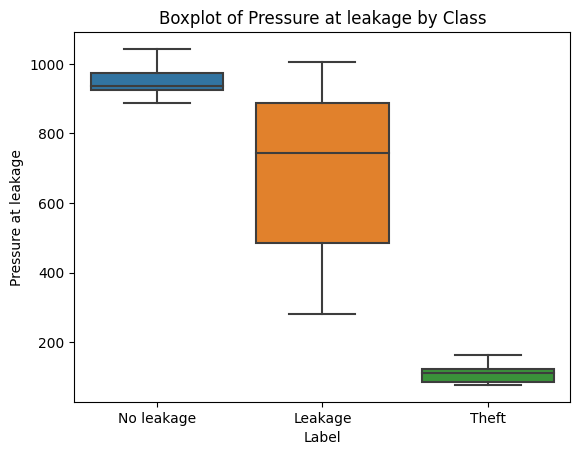

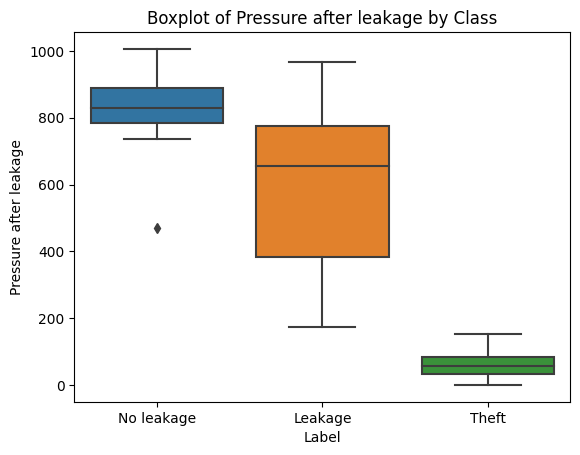

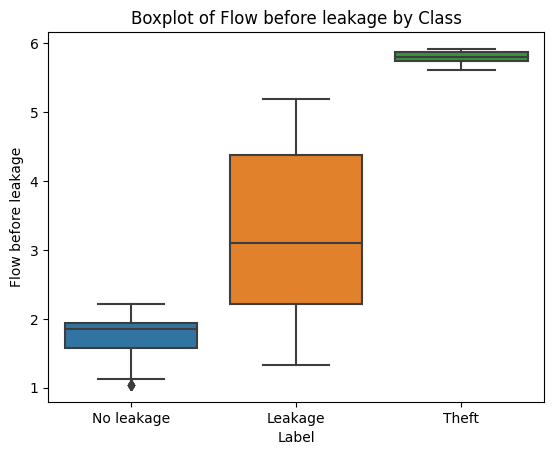

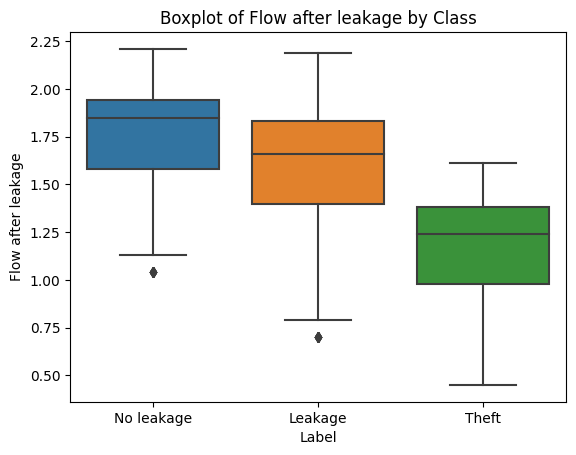

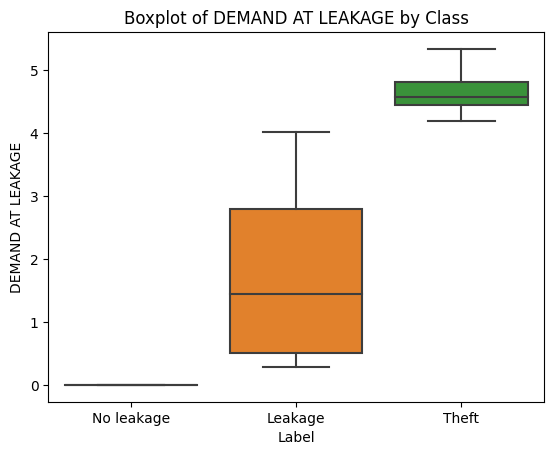

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in data.columns:
    sns.boxplot(x= labels, y = data[column], data = data)
    plt.title(f'Boxplot of {column} by Class')
    plt.show()



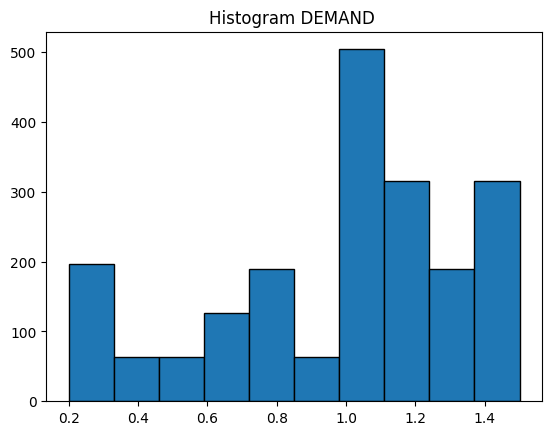

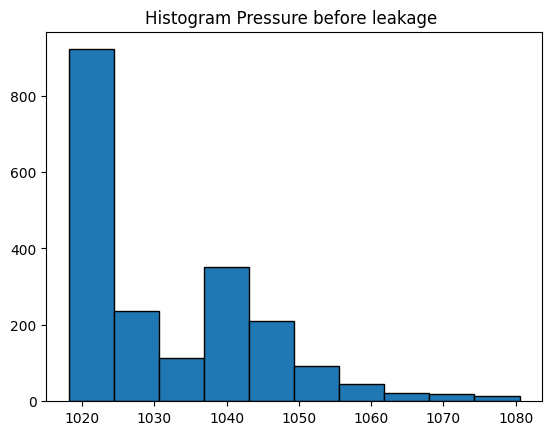

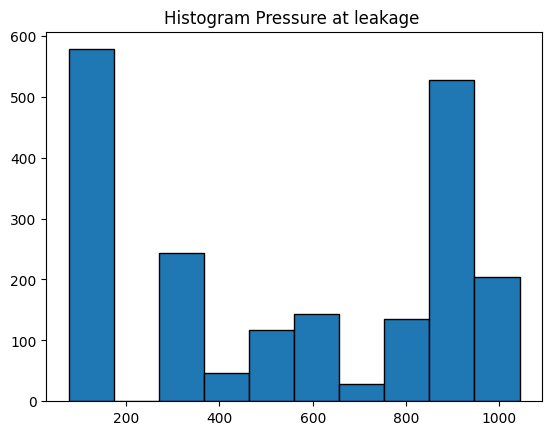

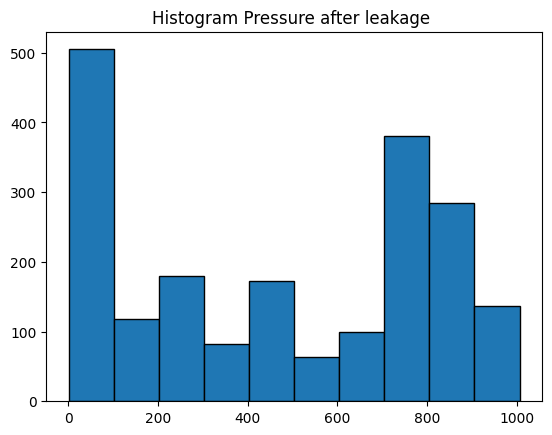

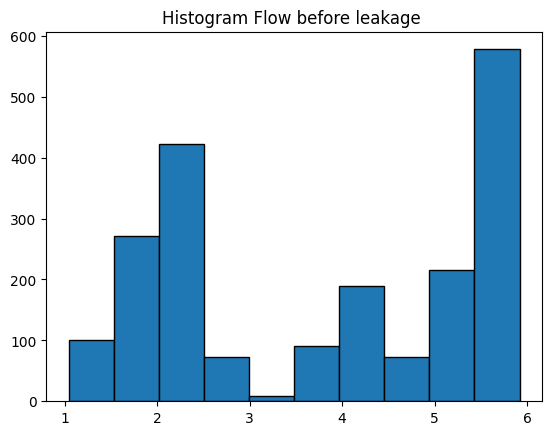

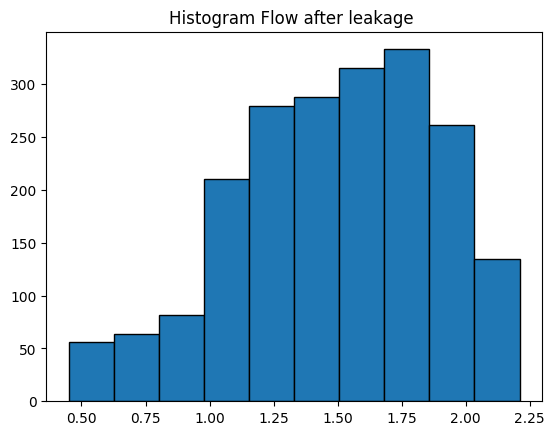

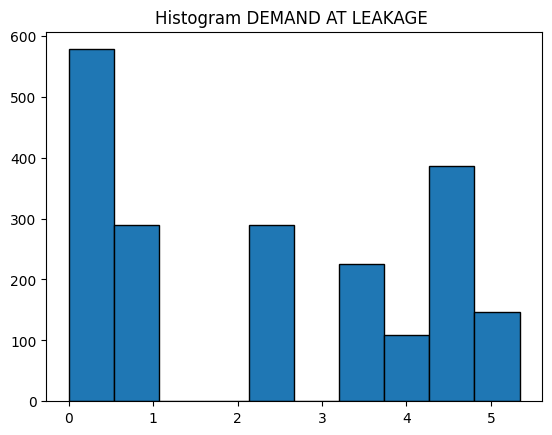

In [17]:
for column in data.columns:
    plt.hist(data[column], edgecolor= 'black')
    plt.title(f'Histogram {column} ')
    plt.show()

In [18]:
for i in X_train.columns:
    if X_train[i].nunique() < 10:
        print(f"{i}: {X_train[i].nunique()}")
zero_var_cols = []
for i in X_train.columns:
    if X_train[i].nunique() < 2:
          zero_var_cols.append(i)


In [19]:
X_train = X_train.drop(df.columns[1], axis=1)
X_test = X_test.drop(df.columns[1], axis=1)
X_train.corr()

,DEMAND,Pressure before leakage,Pressure at leakage,Pressure after leakage,Flow before leakage,Flow after leakage,DEMAND AT LEAKAGE
DEMAND,1.000000,-0.251260,-0.088673,-0.174442,0.108351,0.795641,-0.073738
Pressure before leakage,-0.251260,1.000000,0.895591,0.909189,-0.929925,0.297220,-0.878813
Pressure at leakage,-0.088673,0.895591,1.000000,0.995331,-0.995228,0.525601,-0.984552
Pressure after leakage,-0.174442,0.909189,0.995331,1.000000,-0.993141,0.448953,-0.966459
Flow before leakage,0.108351,-0.929925,-0.995228,-0.993141,1.000000,-0.498295,0.982935
Flow after leakage,0.795641,0.297220,0.525601,0.448953,-0.498295,1.000000,-0.649264
DEMAND AT LEAKAGE,-0.073738,-0.878813,-0.984552,-0.966459,0.982935,-0.649264,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

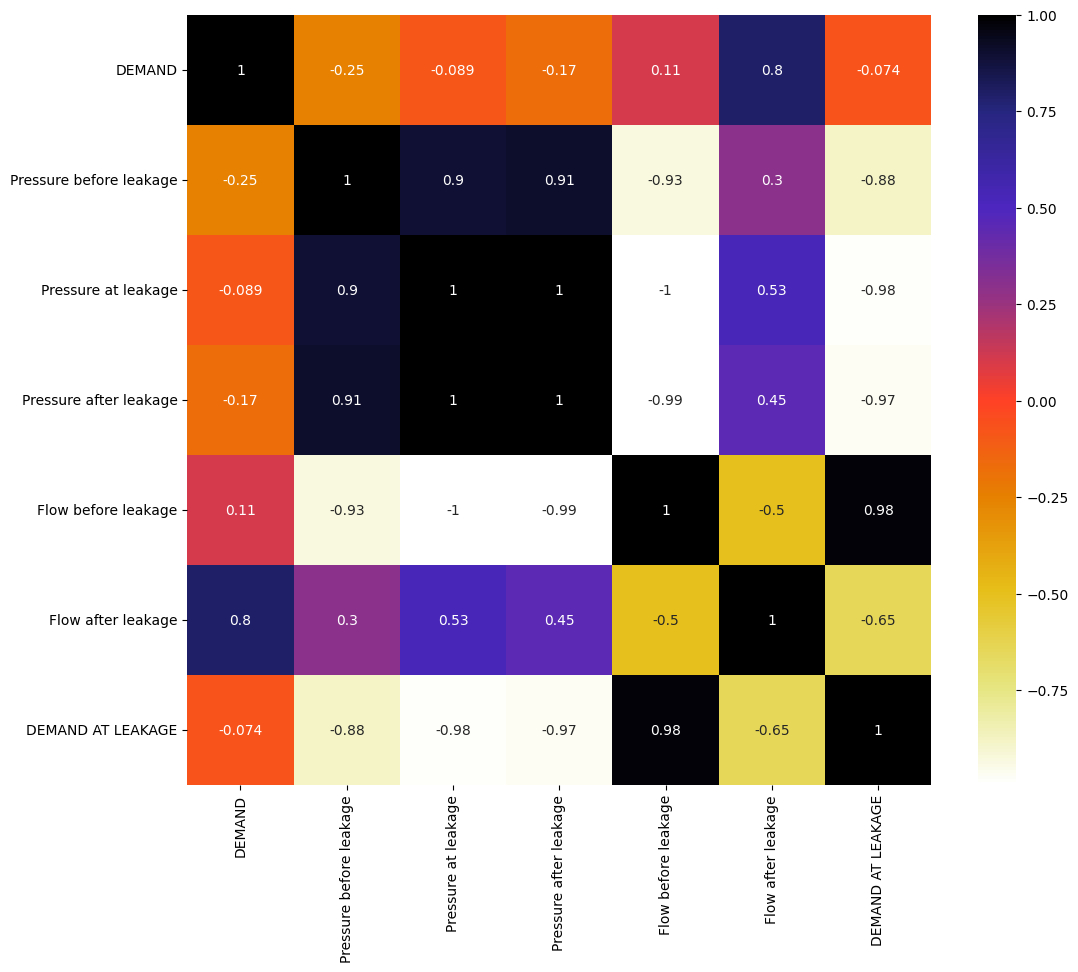

In [20]:
plt.figure(figsize=(12,10))
cor = X_train.iloc[:, :15].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show

In [21]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.80)
len(set(corr_features))

3

In [22]:
data = df.iloc[:, :-1]
labels = df.iloc[:, -1]

features_to_drop = ['Pressure at leakage', 'DEMAND AT LEAKAGE']  # Replace with your actual feature names
data = data.drop(columns=features_to_drop)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



In [23]:
X_test.shape

(405, 6)

In [24]:
X_train.shape


(1618, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

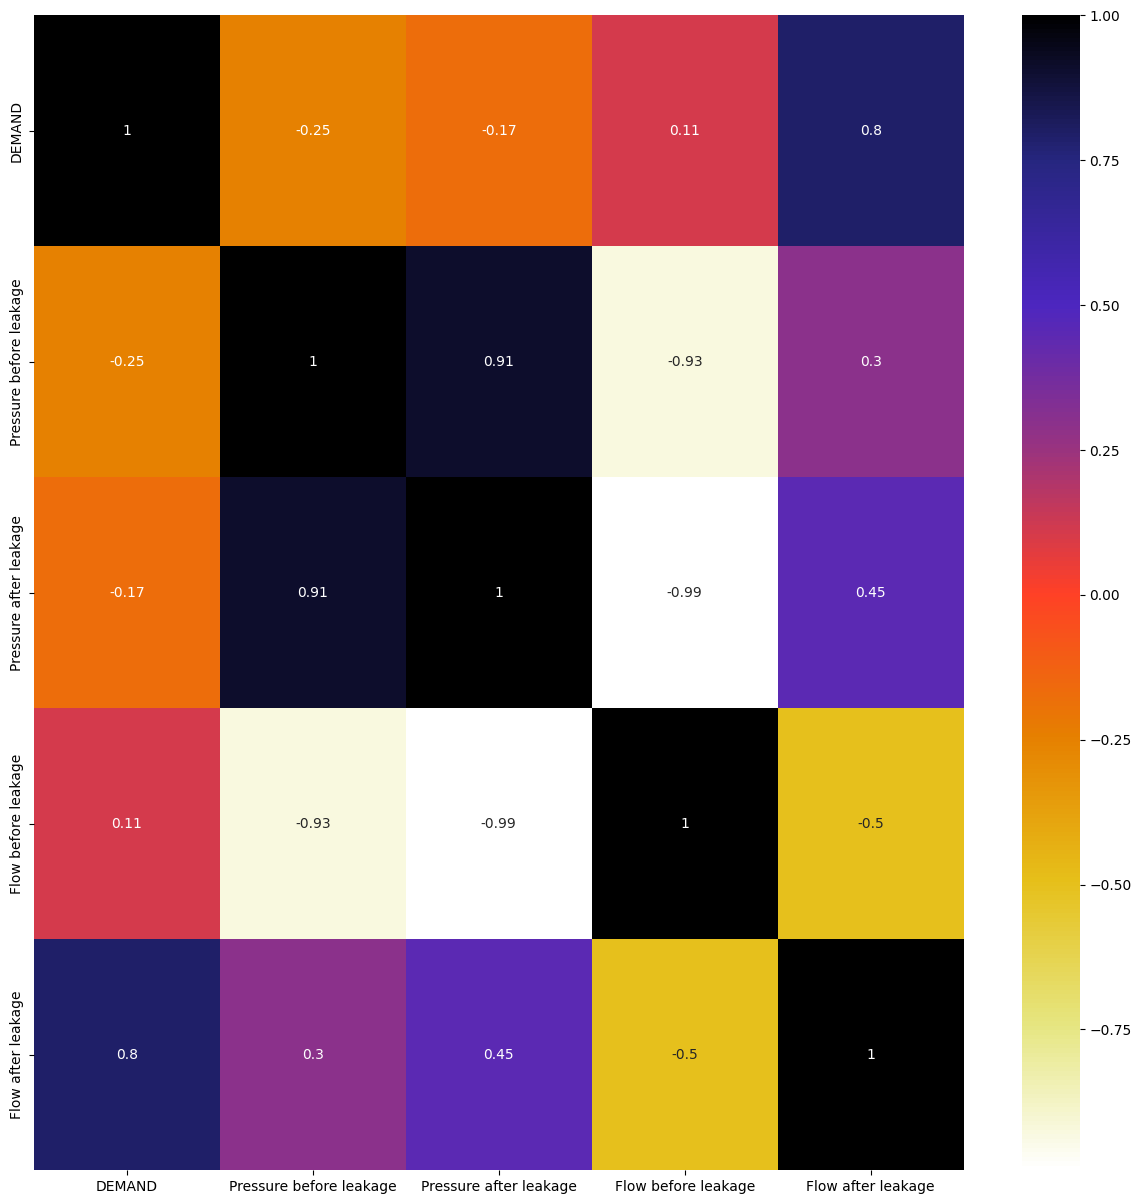

In [25]:
X_train = X_train.drop(df.columns[1], axis=1)
X_test = X_test.drop(df.columns[1], axis=1)
plt.figure(figsize=(15,15))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show

In [26]:
X_train.shape

(1618, 5)

In [27]:
# # MinMax scaling


# scaler = MinMaxScaler()
#X_train = X_train.drop(df.columns[1], axis=1)
#X_test = X_test.drop(df.columns[1], axis=1)

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
X_train.head()


,DEMAND,Pressure before leakage,Pressure after leakage,Flow before leakage,Flow after leakage
1908,1.1,1020.39,243.88,5.05,1.49
1112,1.3,1019.11,16.72,5.90,1.39
926,1.3,1035.80,708.98,2.57,1.99
261,1.3,1036.56,709.61,2.57,1.99
818,1.1,1019.57,34.60,5.88,1.24


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
#print(y_train)

X_train.shape


(1618, 5)

In [29]:
from sklearn.ensemble import RandomForestClassifier
# Create the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test data
predictions = clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, predictions))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00       103

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



In [31]:
from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# data = df.iloc[:, :-1]
# labels = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=32)
X_train = X_train.drop(df.columns[1], axis=1)
X_test = X_test.drop(df.columns[1], axis=1)



In [32]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel:
    model = SVC(kernel=i, C=1.0)
    model.fit(X_train, y_train)
    print("For Kernel:", i)
    print("Accuracy is:", model.score(X_test, y_test))

For Kernel: linear
Accuracy is: 1.0
For Kernel: rbf
Accuracy is: 0.8319604612850082
For Kernel: poly
Accuracy is: 0.8319604612850082
For Kernel: sigmoid
Accuracy is: 0.8220757825370676


In [33]:
model = SVC()
model.fit(X_train, y_train)
print("Accuracy on testing data is ", model.score(X_test, y_test))
print("Accuracy on testing data is ", model.score(X_train, y_train))

Accuracy on testing data is  0.8319604612850082
Accuracy on testing data is  0.8679378531073446


In [34]:
for i in range(1, 10):
  model = SVC(kernel='poly', degree=i, C=100)
  model.fit(X_train, y_train)
  print("Accuracy on testing data is ", model.score(X_test, y_test))
  print("Accuracy on testing data is ", model.score(X_train, y_train))


Accuracy on testing data is  0.85667215815486
Accuracy on testing data is  0.885593220338983
Accuracy on testing data is  0.8747940691927513
Accuracy on testing data is  0.8968926553672316
Accuracy on testing data is  0.9868204283360791
Accuracy on testing data is  0.9887005649717514
Accuracy on testing data is  0.9917627677100495
Accuracy on testing data is  0.9929378531073446
Accuracy on testing data is  0.9917627677100495
Accuracy on testing data is  0.992231638418079
Accuracy on testing data is  0.9967051070840197
Accuracy on testing data is  0.9950564971751412
Accuracy on testing data is  0.9983525535420099
Accuracy on testing data is  0.9964689265536724
Accuracy on testing data is  0.9983525535420099
Accuracy on testing data is  0.9964689265536724
Accuracy on testing data is  0.9983525535420099
Accuracy on testing data is  0.9964689265536724


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid ={'C':[0.1, 1, 100, 1000], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1, 2, 3, 4, 5, 6]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)
print(grid.score(X_test, y_test))